# K Means Clustering

__K-Means__ is an unsupervised learning algorithm that predicts the labels of data points in a set. Starting with a dataset containing clusters of instances, the algorithm seeks each cluster's center, and assigns each instance to the closest cluster. K Means Clustering is very efficient, often terminating in just a few iterations. 

In this module, we implement the K Means Learning algorithm from scratch using artificial data generated by Sklearn's [make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs). 

Let $\{ x^1, ..., x^m\}$ be the feature vectors, or inputs, and let $k$ be a positive integer (chosen via the elbow method).

The algorithm proceeds as follows:

1. Randomly choose k distinct feature vectors as your starting "centroids": ${c_1, c_2, ..., c_k}$. 

2. Assign each feature vector to the closest centroid, and let $\mathcal{A} = \{ x: \ x_i \ \text{is assigned to} \ c_i \}.$
    
3. Let $ c_i \to \frac{1}{|A_i|} \sum_{x \in A_i} x.$

4. Repeat 2 and 3 until the centroid r no longer moves.

5. Return: $A_1, A_2, ..., A_k.$

---

The following packages are required to run the attached code:
- [Matplotlib.pyplot](https://matplotlib.org)
- [Numpy](https://numpy.org)
- [Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

---

In [121]:
# import the relevant libraries 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA

# import the data
X,y = make_blobs()

# normalize the data to lie in the same range. 
X = X/np.max(X)

In [122]:
# extract out the first two columns of the matrix of features
X = X[:, :2]

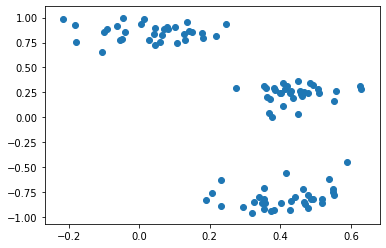

In [123]:
# plot the features
plt.scatter(X[:,0], X[:,1])

---

We can see in the plot above that our data contains approximately three clusters. Thus, we assume there are three classes. 

---

In [124]:
# initialize starting centroids
k = 2

# C will contain our centroids
C = [] 
for _ in range(k):
    i = np.random.randint(len(X))
    C.append(X[i,:])

In [125]:
# define the distance function
def distance(v,w):
    return np.sqrt((v-w) @ (v-w))

# define the function that assigns each feature vector to the closest centroid
def assignment(x, Centroids):
    distances = np.array([distance(x,centroid) for centroid in Centroids])
    return np.argmin(distances)

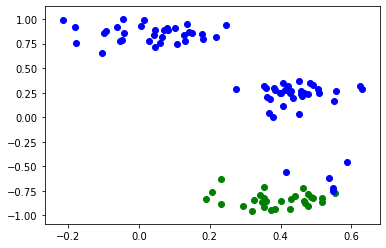

In [126]:
# visualize data at initialization
for x in X:
    if assignment(x, C) == 0:
        plt.scatter(x[0], x[1], color = "blue")
    elif assignment(x, C) == 1:
        plt.scatter(x[0], x[1], color = "green")
    else:
        plt.scatter(x[0], x[1], color = "red")
        
plt.show()

---

Based on our initial data, the algorithm is assigning all of the feature vectors to one of the two initialized centroids. Below, we observe the algorithm adapt and find new centroids. 

---

In [127]:
# define the function that creates classes for the labels
def make_classes(data, Centroids):
    A = dict()
    for i in range(len(Centroids)):
        A[i] = []        
    for x in data:
        A[assignment(x, Centroids)].append(x)
    return A

# define a function that initializes the first centroids
def initialize_centroids(data, k = 2):
    Centroids = [] 
    for _ in range(k):
        i = np.random.randint(len(X))
        Centroids.append(X[i,:])
    return Centroids

def new_centroids(data, Centroids):
    new_Centroids = []
    A = make_classes(data, Centroids)
    for i in range(len(Centroids)):
        if len(A[i]) != 0:
            new_Centroids.append((1/len(A[i]))*sum(A[i]))
        else:
            new_Centroids.append((1/0.001)*sum(A[i]))
    return new_Centroids

def fit(data, k = 3, max_iterations = 1_000, epsilon = 0.01):
    C_old = initialize_centroids(X, k = k)
    C_new = new_centroids(X,C_old)
    centroid_distances = [distance(p[0], p[1]) for p in zip(C_old, C_new)]
    iterations = 0
    while max(centroid_distances) > epsilon and iterations < max_iterations:
        C_old, C_new = C_new, new_centroids(X, C_new)
        centroid_distances = [distance(p[0], p[1]) for p in zip(C_old, C_new)]       
    return C_new

def mse_classes(data, Centroids):
    errors = []
    A_classes = make_classes(data, Centroids)
    for i, centroid in enumerate(Centroids):
        error = sum(.5*(centroid - a) @ (centroid - a) for a in A_classes[i])
        errors.append(error)  
    #for centroid, A_class in zip(Centroids, A_classes):
        #error = sum(0.5*(centroid - a)**2 for a in A_classes)
    #errors.append(error)  
    return sum(x for x in errors)

# output the centroids
C0 = initialize_centroids(X, k = k)
C1 = new_centroids(X, C0)
C2 = new_centroids(X, C1)
C3 = new_centroids(X, C2)

In [128]:
# update the centroids
C0 = initialize_centroids(X, k = k)
C1 = fit(X, k = 1)
C2 = fit(X, k = 2)
C3 = fit(X, k = 3)

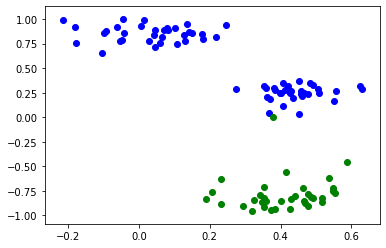

In [129]:
# plot the feature vectors with centroids C0
for x in X:
    if assignment(x, C0) == 0:
        plt.scatter(x[0], x[1], color = "blue")
    elif assignment(x, C0) == 1:
        plt.scatter(x[0], x[1], color = "green")
    else:
        plt.scatter(x[0], x[1], color = "red")

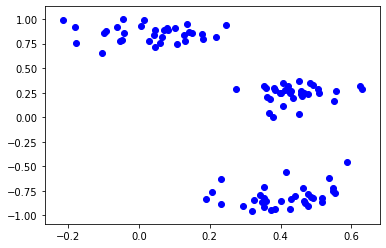

In [130]:
# plot the feature vectors with centroids C1
for x in X: 
    if assignment(x, C1) == 0:
        plt.scatter(x[0], x[1], color = "blue")
    elif assignment(x, C1) == 1:
        plt.scatter(x[0], x[1], color = "green")
    else:
        plt.scatter(x[0], x[1], color = "red")

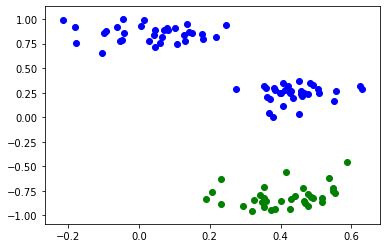

In [131]:
# plot the feature vectors with centroids C2        
for x in X:
    if assignment(x, C2) == 0:
        plt.scatter(x[0], x[1], color = "blue")
    elif assignment(x, C2) == 1:
        plt.scatter(x[0], x[1], color = "green")
    else:
        plt.scatter(x[0], x[1], color = "red") 

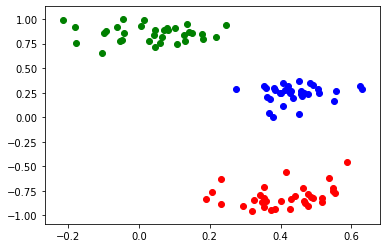

In [132]:
# plot the feature vectors with centroids C3
for x in X:
    if assignment(x, C3) == 0:
        plt.scatter(x[0], x[1], color = "blue")
    elif assignment(x, C3) == 1:
        plt.scatter(x[0], x[1], color = "green")
    else:
        plt.scatter(x[0], x[1], color = "red")       

---

Observe that the labels have clustered in just 4 iterations! Although K-Means is a simple algorithm, it is able to cluster datasets very efficiently.

---